### Let's import what we need first

In [61]:
from bs4 import BeautifulSoup
import pandas as pd

### Then we open the html file and create a bs4 soup with it

In [167]:
with open('partners.html', encoding="utf8") as file:
    soup = BeautifulSoup(file, 'html.parser')

### Now let's scrap what we need!

In [171]:
# in this case, first of all, we need some links
# these links are contained in the 'href' tag inside an 'a' tag inside the class "cell-title" in 'td' tag 

tds = soup.find_all("td", {"class": "cell-title"}) # using find_all we can select the tag and the class

links = [] # creating an empty list

for line in tds: # iterating over the lines in tds object
    line = str(line)[32:] # first we'll catch only what's after href
    end = line.find('">') # then we find the index the ends the href
    line = str(line)[:end] # and catch only the link
    links.append(line) # then append to the list


### The result is a list of string with each link:

['https://www.notion.so/xxxxx1',
 'https://www.notion.so/xxxxx2',
 'https://www.notion.so/xxxxx3']

### Now I'll open the table inside the html as a pandas DataFrame

In [174]:
# first we read the html file and select the only table inside
aux1 = pd.read_html(str(soup))[0]

# then we select only the column that we need
df = pd.DataFrame(aux['User'])

# then we add the scrapped links from before as a new column 
# since the users and the links are in the same order there is no need for ordering
df['Link'] = links

### This is the result:

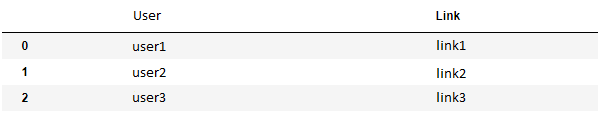

### Now we save as an excel file

In [170]:
df.to_excel('notion_user_link.xlsx')